# Support Vector Machine - Code

In diesem Notebook schauen wir uns die `Support Vector Machine` im Code an.

## Setup

Setup Code muss *nicht* verstanden werden.

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [166]:
from sklearn.preprocessing import OrdinalEncoder
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02, same_aspect=False, ax=None, delta=3):

    if isinstance(y, pd.Series):
        y = y.values

    if isinstance(X, pd.DataFrame):
        X = X.values

    order = ['Setosa', 'Virginica', 'Versicolor']

    palette=dict(zip(
        order,
        sns.color_palette()
    ))

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - delta, X[:, 0].max() + delta
    x2_min, x2_max = X[:, 1].min() - delta, X[:, 1].max() + delta
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = OrdinalEncoder(categories=[order]).fit_transform(Z.reshape(-1, 1))
    Z = Z.reshape(xx1.shape)


    plt.autoscale(True)
    ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=palette, ax=ax, zorder=10)

    plt.autoscale(False)
    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap=ListedColormap(palette.values()))

    if same_aspect:
        plt.gca().set_aspect('equal', adjustable='box')

    _ = ax.set_xlabel('petal length (cm)')
    _ = ax.set_ylabel('petal width (cm)')
    return ax

In [167]:
# sepal length,sepal width,petal length,petal width,name
df = pd.read_csv('data/iris.csv')[['sepal length', 'sepal width', 'petal length', 'petal width', 'name']].rename(columns={
    'sepal length': 'sepal length (cm)',
    'sepal width': 'sepal width (cm)',
    'petal length': 'petal length (cm)',
    'petal width': 'petal width (cm)',
})

## Train-Validation Split

Teile Daten in Train-Set und Validation-Set.

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

X_train, X_val, y_train, y_val = train_test_split(df[['petal length (cm)', 'petal width (cm)']], df['name'], test_size=0.2)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(120, 2) (30, 2) (120,) (30,)


## Linear Support Vector Machine (`kernel='linear'`)

In [169]:
model = Pipeline([
    ('std', StandardScaler()),
    ('clf', SVC(kernel='linear'))
])
model.fit(X_train, y_train)

Pipeline(steps=[('std', StandardScaler()), ('clf', SVC(kernel='linear'))])

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


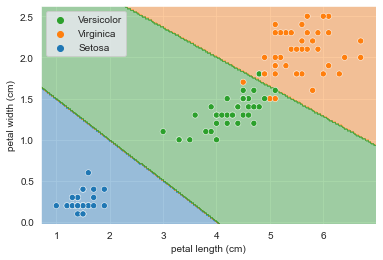

In [170]:
plot_decision_regions(X_train, y_train, model)
plt.show()

In [171]:
y_train_hat = model.predict(X_train)
accuracy_score_train = accuracy_score(y_train, y_train_hat)
print("Train Set:", f"{accuracy_score_train*100}%")

y_val_hat = model.predict(X_val)
accuracy_score_val = accuracy_score(y_val, y_val_hat)
print("Test Set:", f"{accuracy_score_val*100}%")

Train Set: 96.66666666666667%
Test Set: 93.33333333333333%


## Non-linear Support Vector Machine (`kernel='rbf'`)

In [172]:
model = Pipeline([
    ('std', StandardScaler()),
    ('clf', SVC(kernel='rbf'))
])
model.fit(X_train, y_train)

Pipeline(steps=[('std', StandardScaler()), ('clf', SVC())])

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


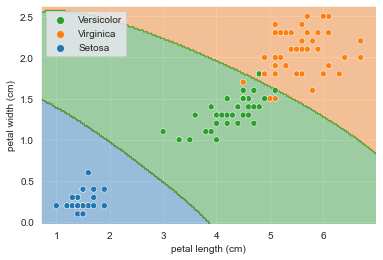

In [173]:
plot_decision_regions(X_train, y_train, model)
plt.show()

In [174]:
y_train_hat = model.predict(X_train)
accuracy_score_train = accuracy_score(y_train, y_train_hat)
print("Train Set:", f"{accuracy_score_train*100}%")

y_val_hat = model.predict(X_val)
accuracy_score_val = accuracy_score(y_val, y_val_hat)
print("Test Set:", f"{accuracy_score_val*100}%")

Train Set: 96.66666666666667%
Test Set: 93.33333333333333%
